In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import h3 
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import folium 
import os 
import random
import plotly.graph_objects as go
from folium import plugins
from tqdm import tqdm
from plotly.subplots import make_subplots
import missingno as msno 
import json
import geojson
import matplotlib
import re
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv('laptops.csv')
df.head(4)

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   920 non-null    int64 
 1   title        920 non-null    object
 2   price        920 non-null    object
 3   discount     831 non-null    object
 4   Processor    920 non-null    object
 5   RAM          920 non-null    object
 6   OS           920 non-null    object
 7   SSD          920 non-null    object
 8   Display      920 non-null    object
 9   In_build_sw  357 non-null    object
 10  warranty     906 non-null    object
dtypes: int64(1), object(10)
memory usage: 79.2+ KB


In [4]:
df.shape

(920, 11)

In [5]:
df.columns

Index(['Unnamed: 0', 'title', 'price', 'discount', 'Processor', 'RAM', 'OS',
       'SSD', 'Display', 'In_build_sw', 'warranty'],
      dtype='object')

In [6]:
df.sample(6)

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
705,705,HP Celeron Dual Core - (8 GB/256 GB SSD/Window...,"₹25,999","₹36,96529% off",Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
680,680,GIGABYTE G5 KD Core i5 11th Gen - (16 GB/512 G...,"₹89,990","₹1,51,80040% off",Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,NaN,2 year carry on warranty
831,831,DELL Core i5 11th Gen - (8 GB/512 GB SSD/Windo...,"₹52,890","₹61,20213% off",Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,NaN,1 Year Onsite Warranty
58,58,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"₹33,990","₹59,39042% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,NaN,1 Year Carry-in Warranty
896,896,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,"₹46,490","₹58,56720% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 Inch) Display,NaN,1 Year Onsite Warranty
27,27,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,"₹41,990","₹61,20231% off",Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,RAM & Storage: 8GB DDR4 & 1TB + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border","Ports: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, ...",NaN,Intel Core i3 Processor (11th Gen)


In [7]:
df.describe()

,Unnamed: 0
count,920.000000
mean,459.500000
std,265.725422
min,0.000000
25%,229.750000
50%,459.500000
75%,689.250000
max,919.000000


# Pre-Processing

In [8]:
#Collect laptop brand
df['make'] = df['title'].str.split(' ').str[0]
df.make.value_counts()

ASUS         263
HP           165
DELL         162
Lenovo       108
acer          62
MSI           50
APPLE         44
Infinix       31
SAMSUNG        8
GIGABYTE       7
realme         4
Avita          4
ALIENWARE      4
LG             2
RedmiBook      2
Vaio           1
Nokia          1
Mi             1
Ultimus        1
Name: make, dtype: int64

In [9]:
df[df.make == 'DELL']['Processor']

0      Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...
27     Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...
30     Processor: Intel i5-1235U (Base- 3.30 GHz & Tu...
55     Processor: Intel i5-1235U (Base- 3.30 GHz & Tu...
73                    Intel Core i3 Processor (10th Gen)
                             ...                        
905                   Intel Core i5 Processor (11th Gen)
906    Processor: AMD Athlon Silver 3050U (2.30 GHz u...
910                   Intel Core i3 Processor (11th Gen)
916    Processor: i5-11260H (Base: 2.60 GHz up to 4.4...
917                    Intel Pentium Quad Core Processor
Name: Processor, Length: 162, dtype: object

In [11]:
df['Processor'] = df['Processor'].str.replace('Processor: ','')
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,make
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM,DELL
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS


In [12]:
#counts of processors
df.Processor.value_counts()

Intel Core i5 Processor (11th Gen)                                 95
AMD Ryzen 7 Octa Core Processor                                    87
Intel Core i3 Processor (11th Gen)                                 80
Intel Core i5 Processor (12th Gen)                                 78
AMD Ryzen 5 Hexa Core Processor                                    75
                                                                   ..
AMD Ryzen 7-5825U (2.00 GHz up to 4.50 GHz)                         1
AMD R7-6800H (3.20 GHz Up to 4.70 Ghz 8 cores 16MB L3 Cache)        1
AMD Ryzen 5 Dual Core Processor (5th Gen)                           1
R3-5425U (2.70 GHz up to 4.1 GHz)                                   1
Intel i7-1255U (Base- 3.50 GHz & Turbo up to 4.70 GHz) 10 Cores     1
Name: Processor, Length: 92, dtype: int64

In [13]:
df.shape

(920, 12)

In [14]:
#get only laptops with ["Intel", 'AMD', 'Apple', 'Nvidia']

df['processor_brand'] = df.Processor.str.split(' ').str[0]
df = df[df['processor_brand'].isin(['Intel','AMD','Apple','NVIDIA'])]
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,make,processor_brand
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM,DELL,Intel
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,Intel
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,Intel
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,Intel
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,Intel


In [15]:
df.head()

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,make,processor_brand
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,"₹37,990","₹58,48935% off",Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4...,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Key...,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM,DELL,Intel
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,HP,Intel
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Dam...,Lenovo,Intel
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,HP,Intel
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,ASUS,Intel


In [18]:
# Get Intel Gen
intel_gen = df[df.processor_brand == 'Intel']['Processor'].str.split('(').str[1].str.replace(')', '').fillna(0)
intel_gen = intel_gen[intel_gen.isin(['11th Gen','12th Gen','10th Gen',0,'8th Gen','9th Gen','7th Gen'])]
df['intel_gen'] = intel_gen
df['intel_gen'] = df['intel_gen'].fillna(0)


# Get Intel Series
intel_series = df[df.processor_brand == 'Intel']['Processor'].str.split(' ').str[2].fillna(0)
intel_series = intel_series[intel_series.isin(['i5','i7','i3','i9'])]
df['intel_series'] = intel_series
df['intel_series'] = df['intel_series'].fillna(0)


# Get Ryzen series
amd_series = df[df.processor_brand == 'AMD']['Processor'].str.split(' ').str[1:3].str.join(',').str.replace(',',' ').fillna(0)
amd_series = amd_series[amd_series.isin(['Ryzen 7','Ryzen 5', 'Ryzen 3','Ryzen 9', 0])]
df['amd_series'] = amd_series
df['amd_series'] = df['amd_series'].fillna(0)

#######################################

#### Storage Device ####

# Get storage device type
b = df.SSD
b = b[b.str.contains('GB|TB')]
has_hdd = b.str.contains("HDD")
has_ssd = b.str.contains("SSD")
df['has_ssd'] = has_ssd.astype(int)
df['has_hdd'] = has_hdd.astype(int)


# Collect storage sizes
sizes = b.str.replace('|','').str.split(' ').str.join(' ').str.replace('SSD', '').str.replace('HDD','').str.strip()
sizes.value_counts()

# Convert GB to TB
conversions = {'1 TB 512 GB': 1.5,
               '2 TB':2,
               '1 TB':1,
               '1 TB 256 GB':1.25,
               '256 GB 256 GB': 0.5, 
               '512 GB 512 GB':1,
               '512 GB':0.5 , 
               '256 GB': 0.25, 
               '128 GB': 0.128,
              '4 TB':4,
              '1 TB 1 TB' : 2,
              '1 TB 128 GB': 1.25}
sizes = sizes.map(conversions)
df['storage_size'] = sizes

#######################################

##### Display Size ######

# Get Display Sizes
p = df.Display.str.split(' ').str.join(' ').apply(lambda st: st[st.find("(")+1:st.find(")")])
p = p.str.upper().str.split(' ').str[0]
p = pd.to_numeric(p, errors='coerce')
p = p[p<500]
df['Display'] = p

#######################################

######## Included Software ########

# Replace all NaN included software with No
df['In_build_sw'] = df['In_build_sw'].fillna('No')


In_build_sw = df.In_build_sw.where(df.In_build_sw == 'No')
In_build_sw = In_build_sw.fillna(True)
In_build_sw = In_build_sw.replace({'No': False}).astype(int)
df['In_build_sw'] = In_build_sw

#######################################
############# RAM ############

# Parse ram into ram_size and ram_type
ram  = df.RAM

ram = ram[ram.str.contains('RAM')]
ram = ram[ram.str.split(' ').str[0].str.isnumeric()]
# Get the size of RAM
df['ram_size'] = ram.str.split(' ').str[0].astype(int)

# Get the Ram Type
df['ram_type'] = ram.str.split(' ').str[2].astype('object')

#######################################

df['discount'] = df['discount'].fillna(0) #Filling with 0 before dropping NANs
df = df.dropna(axis=0)

#######################################

############# Price to USD ############

ruppee_prices = df.price.str.replace('₹','').str.replace(',','').astype(float)
ruppee_prices = np.round(ruppee_prices*0.012,2)
df['price'] = ruppee_prices
df = df.drop(['discount'], axis=1) # Drop discount bc it doesnt make sense

#######################################
########## Operating System ###########

os = df.OS
os.unique()

os_options = {'64 bit Windows 11 Operating System' : "Windows 11",
       'Windows 11 Operating System' : "Windows 11",
       '64 bit Windows 10 Operating System' : 'Windows 10',
        'DOS Operating System' : 'DOS',
       '32 bit Windows 11 Operating System': "Windows 11", 
        'Mac OS Operating System' : 'Mac OSX',
       '64 bit Chrome Operating System' : 'Chrome OS', 
            'Windows 10 Operating System': 'Windows 10',
       '64 bit Windows 8 Operating System': 'Windows 8'}

df = df.replace({'OS': os_options})
#######################################
############# Warranty ################
warranty_length = df.warranty.str.split(' ').str[0]
warranty_length = pd.to_numeric(warranty_length, errors='coerce')
warranty_length = warranty_length[warranty_length.isin([1,2,3])]
df['warranty_length'] = warranty_length
#######################################

df = df.drop(['RAM', 'warranty', 'SSD'], axis=1) # Removing bc of extracted features

df.head()

,Unnamed: 0,title,price,Processor,OS,Display,In_build_sw,make,processor_brand,intel_gen,intel_series,amd_series,has_ssd,has_hdd,storage_size,ram_size,ram_type,warranty_length
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,425.88,Intel Core i3 Processor (11th Gen),Windows 11,14.0,0,HP,Intel,11th Gen,i3,0,1.0,0.0,0.25,8.0,DDR4,1.0
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,407.99,Intel Core i3 Processor (11th Gen),Windows 11,15.6,0,Lenovo,Intel,11th Gen,i3,0,1.0,0.0,0.50,8.0,DDR4,1.0
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,545.88,Intel Core i3 Processor (12th Gen),Windows 11,15.6,1,HP,Intel,12th Gen,i3,0,1.0,0.0,0.50,8.0,DDR4,1.0
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,407.88,Intel Core i3 Processor (10th Gen),Windows 11,15.6,1,ASUS,Intel,10th Gen,i3,0,1.0,0.0,0.50,8.0,DDR4,1.0
5,5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,815.88,AMD Ryzen 7 Octa Core Processor,Windows 11,17.3,0,ASUS,AMD,0,0,Ryzen 7,1.0,0.0,0.50,8.0,DDR4,1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

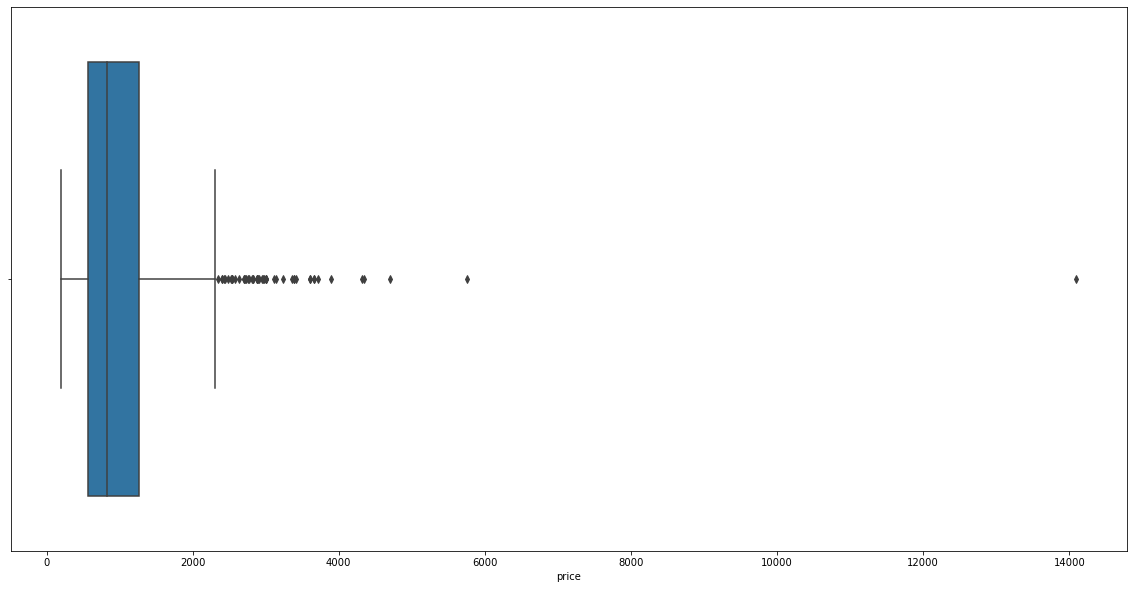

In [19]:
fig = plt.figure(figsize = (20,10))
sns.boxplot(df['price'])

In [20]:
#drop crazy outlier 
df = df[df['price'] < 8000]

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'Display'}>],
       [<AxesSubplot:title={'center':'In_build_sw'}>,
        <AxesSubplot:title={'center':'has_ssd'}>,
        <AxesSubplot:title={'center':'has_hdd'}>],
       [<AxesSubplot:title={'center':'storage_size'}>,
        <AxesSubplot:title={'center':'ram_size'}>,
        <AxesSubplot:title={'center':'warranty_length'}>]], dtype=object)

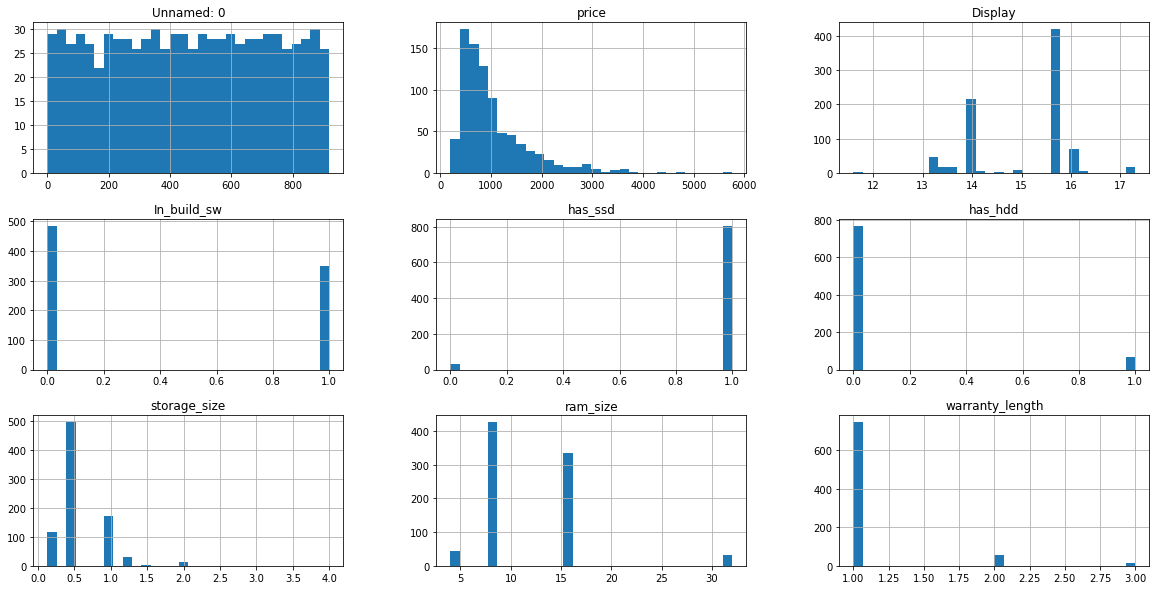

In [27]:
df.hist(bins =30 , figsize = (20,10))

In [28]:
# set price as last col
price = df.price
df = df.drop(['price'], axis = 1)
df['price'] = price

In [30]:
# encode cat columns and heatmap 
cat_cols = ['OS', 'make', 'processor_brand', 'Processor', 'intel_gen', 'intel_series',
           'amd_series', 'ram_type']
encoded_df = pd.get_dummies(df, columns = cat_cols)

In [31]:
#create correlation visualization 
mat = encoded_df.corr('pearson')
data_corr = mat[['price']].sort_values(by = 'price', ascending = False)[:30]

Text(0.5, 1.0, 'Feature Correlation with Sales Price')

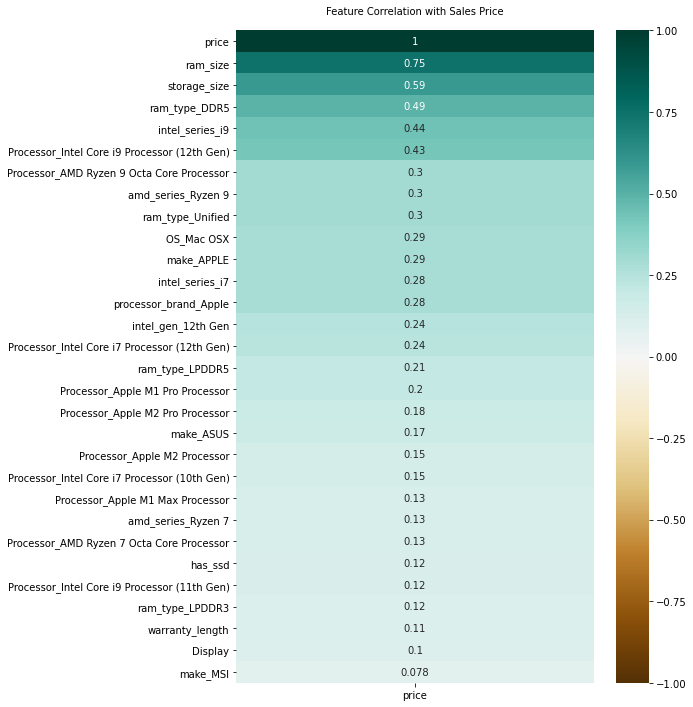

In [35]:
plt.figure(figsize = (8,12))
heatmap = sns.heatmap(data_corr, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Feature Correlation with Sales Price', fontdict ={'fontsize':10}, pad = 16)

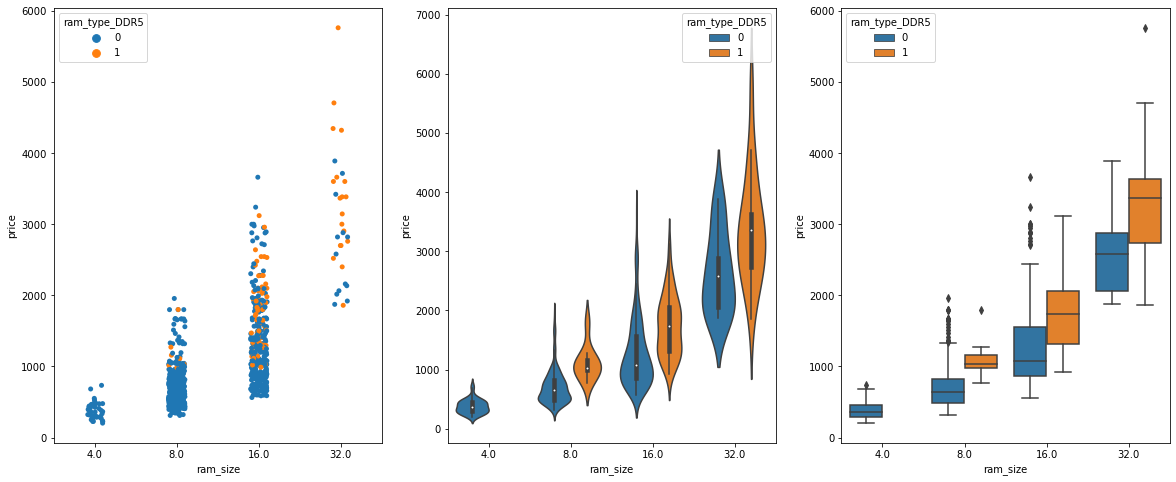

In [44]:
figure, ax = plt.subplots(1, 3, figsize = (20,8))
sns.stripplot(data = encoded_df, x = 'ram_size', y='price', ax = ax[0], hue = 'ram_type_DDR5')
sns.violinplot(data = encoded_df, x = 'ram_size', y='price', ax = ax[1], hue = 'ram_type_DDR5')
sns.boxplot(data = encoded_df, x = 'ram_size', y='price', ax = ax[2], hue = 'ram_type_DDR5')
plt.show()

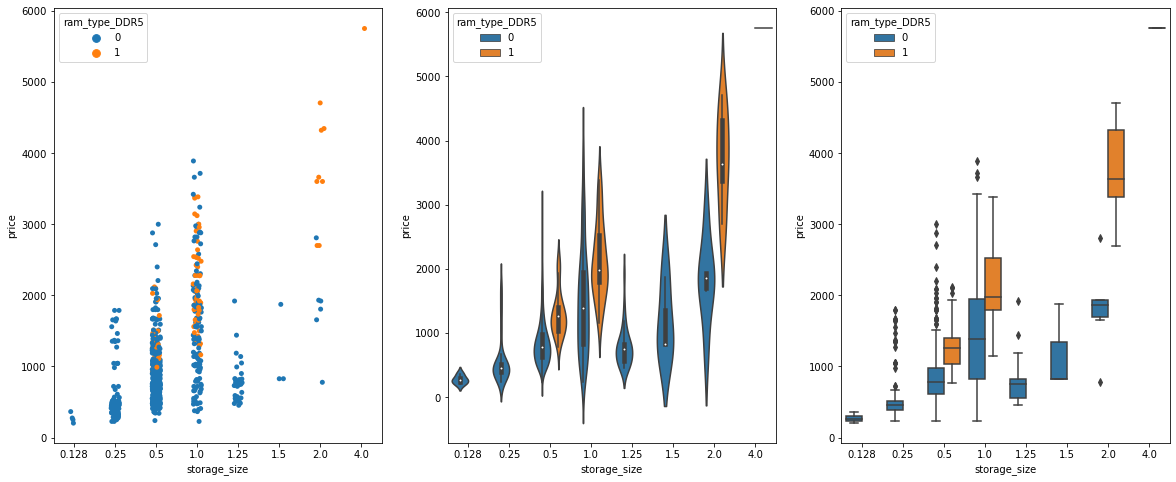

In [46]:
figure, ax = plt.subplots(1, 3, figsize = (20,8))
sns.stripplot(data = encoded_df, x = 'storage_size', y='price', ax = ax[0], hue = 'ram_type_DDR5')
sns.violinplot(data = encoded_df, x = 'storage_size', y='price', ax = ax[1], hue = 'ram_type_DDR5')
sns.boxplot(data = encoded_df, x = 'storage_size', y='price', ax = ax[2], hue = 'ram_type_DDR5')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

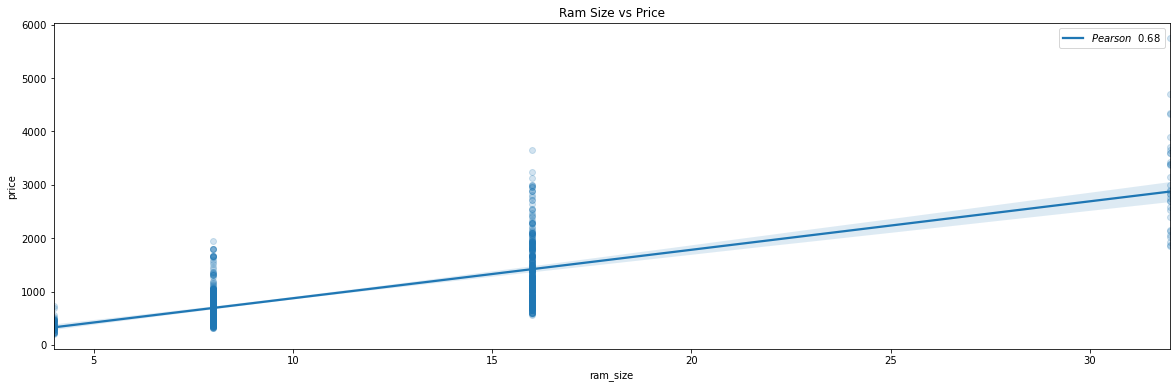

In [50]:
ram_size = 0.68

plt.figure(figsize = (20,6))
sns.regplot(data = encoded_df, x = 'ram_size', y = 'price', scatter_kws = {'alpha':0.2})
plt.title("Ram Size vs Price", fontsize = 12)
plt.legend(['$Pearson$ {: .2f}'.format(ram_size)], loc = 'best')
plt.show